In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import os, sys

In [17]:
file_date = '2019-09-02-173252'

# Actions

In [18]:
print(os.getcwd())
import glob
Agent_1_interaction_data_files = glob.glob('../SHARCNET/Results/debug/Random/' + file_date + '/log/*.csv')
Agent_1_interaction_data_files.sort()
Agent_1_interaction_data_files

F:\unity_simulator\unity_simulator\notebook


['../SHARCNET/Results/debug/Random/2019-09-02-173252/log\\2019-09-02.csv',
 '../SHARCNET/Results/debug/Random/2019-09-02-173252/log\\2019-09-03.csv',
 '../SHARCNET/Results/debug/Random/2019-09-02-173252/log\\2019-09-04.csv']

In [19]:
Agent_1_interaction_data = {}
for file in Agent_1_interaction_data_files:
    Agent_1_interaction_data[file] = pd.read_csv(file, header=None)
    Agent_1_interaction_data[file].columns = ['Time','Observation','Action','Reward']
    def convert_str_to_matrix(data):
        # remove '\r\n', '[', ']', then split with ' '
        temp_list = data.replace('\n', '').replace('[','').replace(']','').split(' ')
        return np.array([float(item) for item in temp_list if item != ''])
    Agent_1_interaction_data[file]['Observation'] = Agent_1_interaction_data[file]['Observation'].apply(convert_str_to_matrix)
    Agent_1_interaction_data[file]['Action'] = Agent_1_interaction_data[file]['Action'].apply(convert_str_to_matrix)
    print(Agent_1_interaction_data[file].shape)

(31077, 4)
(114490, 4)
(54433, 4)


In [30]:
Agent_1_interaction_data_all = {}
Agent_1_interaction_data_all['data'] = pd.DataFrame()
#Agent_1_interaction_data_all['separate_line'] = []
Agent_1_interaction_data_all['date'] = []
for key in Agent_1_interaction_data.keys():
    Agent_1_interaction_data_all['data'] = pd.concat([Agent_1_interaction_data_all['data'], Agent_1_interaction_data[key]])
    #Agent_1_interaction_data_all['separate_line'].append(len(Agent_1_interaction_data[key]))
    Agent_1_interaction_data_all['date'].append(key.split('/')[2].split('-')[0])

In [31]:

# Convert action into np.array
Agent_1_action = np.array(Agent_1_interaction_data_all['data']['Action'].tolist())
# read action_space_name
action_space_name = pd.read_csv('action_space_name_raw.csv')

Agent_1_action_df = pd.DataFrame(Agent_1_action, columns = action_space_name['actuator_name'])
Agent_1_action_df.shape

(200000, 168)

In [32]:
Agent_1_action_df

actuator_name,light_node#1,light_node#2,light_node#3,light_node#4,light_node#5,light_node#6,light_node#7,light_node#8,light_node#9,light_node#10,...,sma3_node#23,sma4_node#23,sma5_node#23,sma6_node#23,sma1_node#24,sma2_node#24,sma3_node#24,sma4_node#24,sma5_node#24,sma6_node#24
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.794042,-0.029694,-0.872176,0.512799,0.940331,-0.779056,0.449151,-0.268184,0.001596,-0.823951,...,0.059790,0.321753,-0.684034,0.400581,-0.372189,-0.805758,-0.758538,0.161031,0.690626,0.285878
2,0.990761,0.094200,-0.369136,-0.410613,-0.487496,-0.437318,0.689319,0.180482,-0.854812,-0.462074,...,-0.134961,0.055606,0.198677,-0.684886,0.801846,-0.641575,-0.557410,-0.649001,-0.043279,0.275822
3,-0.150355,-0.487122,0.294149,0.837352,-0.975935,0.076634,-0.251640,-0.170912,-0.248605,0.120325,...,-0.754561,-0.125035,-0.244677,0.133879,-0.947824,-0.783381,0.965701,-0.048914,-0.807758,0.317247
4,0.996022,0.293405,0.839828,-0.223731,-0.901275,-0.023278,0.038842,0.644956,0.804745,0.062047,...,0.308117,0.543192,-0.792366,-0.973600,0.219237,-0.376886,0.183603,0.436894,-0.387093,-0.888869
5,-0.086793,-0.119331,0.192723,-0.390344,0.081358,0.226887,0.965360,-0.527444,-0.606910,0.847203,...,0.524470,0.784653,-0.099178,0.014125,-0.488475,0.000080,0.752589,0.388258,-0.869219,-0.447601
6,-0.078961,-0.409587,0.488120,0.058920,-0.292404,0.543729,-0.129936,-0.375185,0.481355,-0.387848,...,0.289701,-0.569846,-0.788906,-0.979587,0.694183,-0.456523,0.439924,0.641768,-0.243539,-0.336872
7,-0.817528,0.837344,-0.862649,-0.250923,0.250734,-0.433594,-0.983582,0.482841,-0.984049,-0.346293,...,0.059301,0.541227,-0.907939,0.865880,-0.386698,0.398819,-0.688151,-0.580391,0.936485,-0.499587
8,-0.535392,-0.470218,0.545434,0.065863,0.143733,0.285072,-0.020292,0.485469,0.669452,0.160787,...,0.615336,-0.342993,0.721127,0.453793,-0.002902,0.308248,-0.159162,0.711079,-0.180641,-0.208505
9,0.714079,0.461229,-0.672232,-0.245016,-0.827269,0.851945,-0.519498,0.415902,0.150727,-0.169496,...,0.064410,0.379884,0.132297,0.248072,0.858596,0.856069,-0.527781,-0.163474,-0.451919,-0.703568


c:\users\ufo37\.conda\envs\unity_ml\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


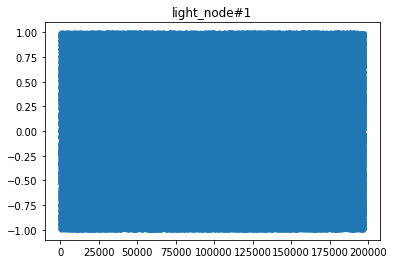

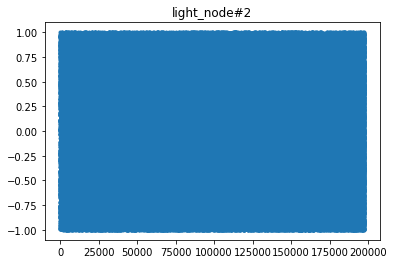

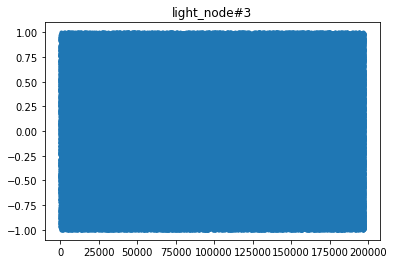

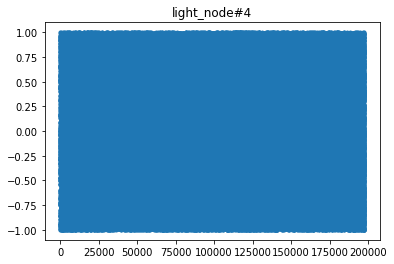

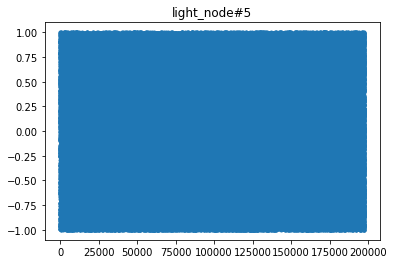

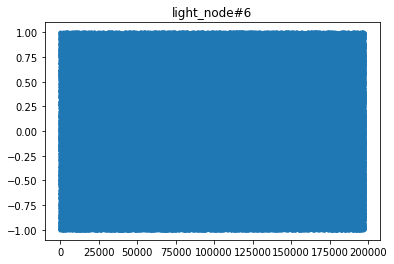

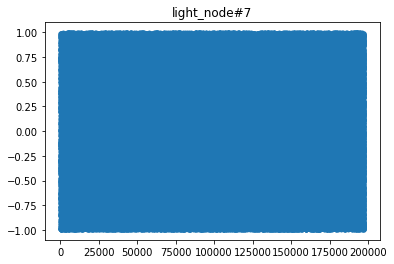

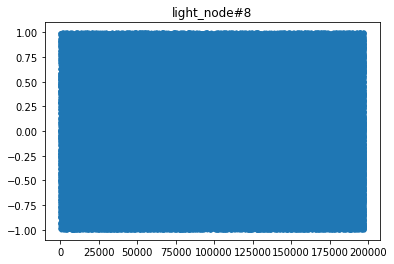

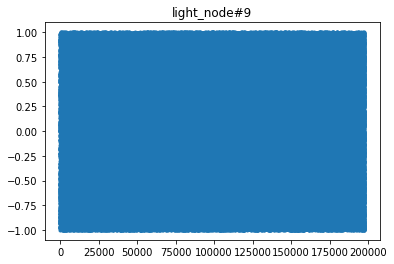

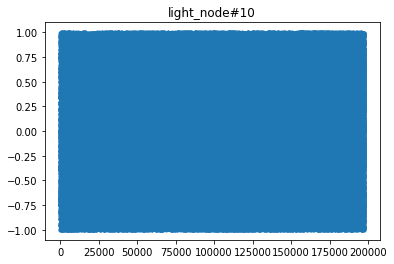

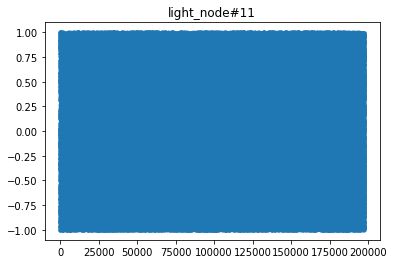

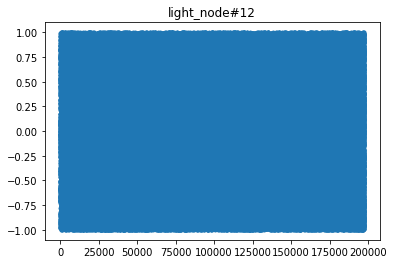

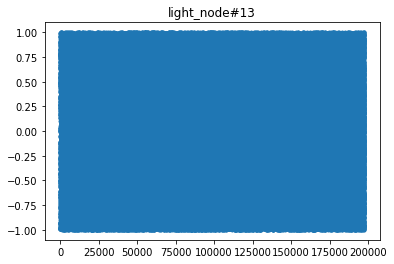

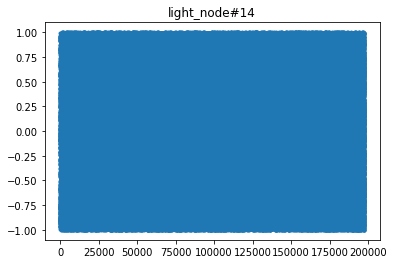

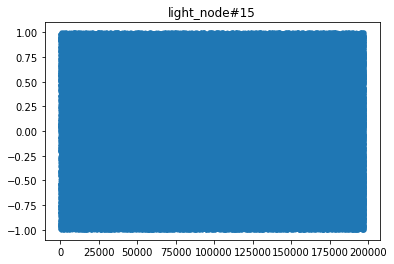

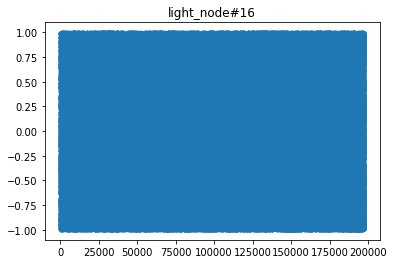

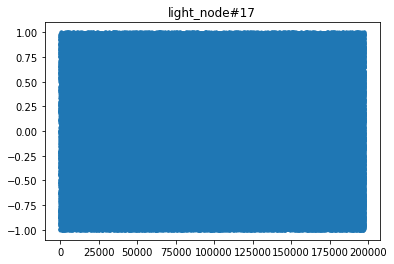

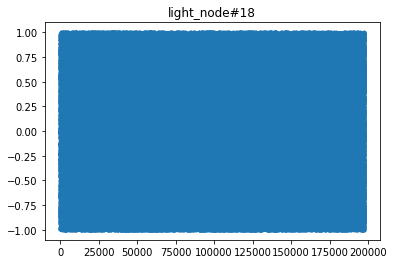

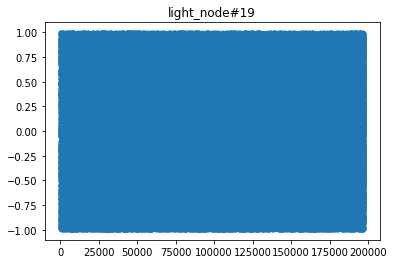

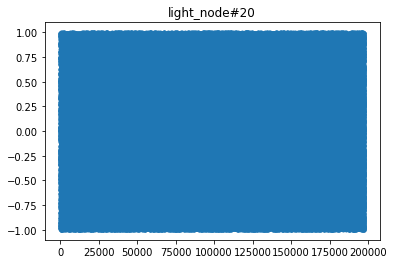

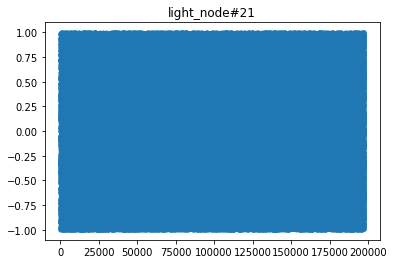

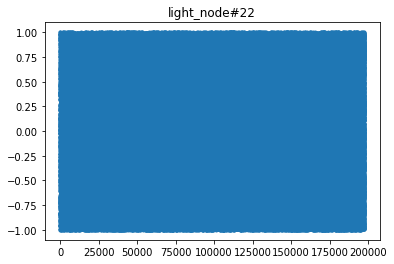

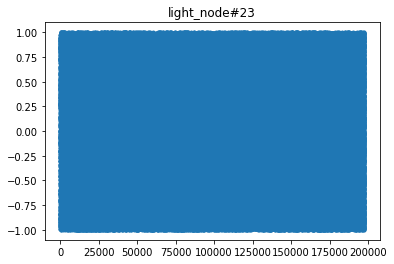

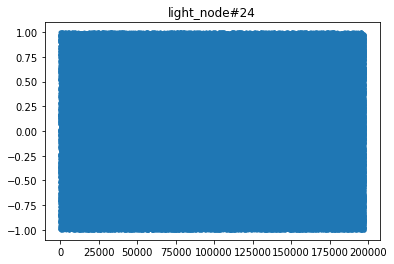

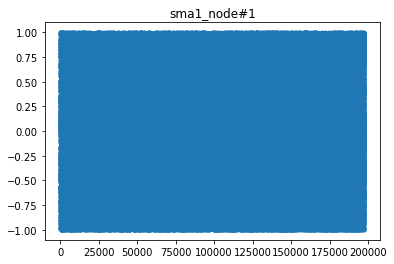

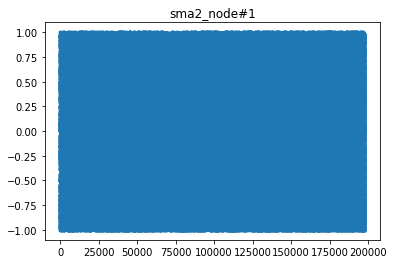

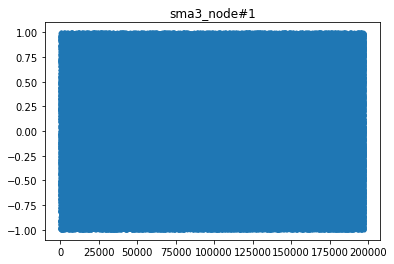

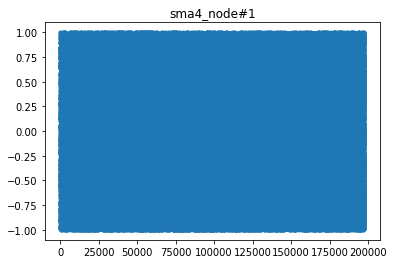

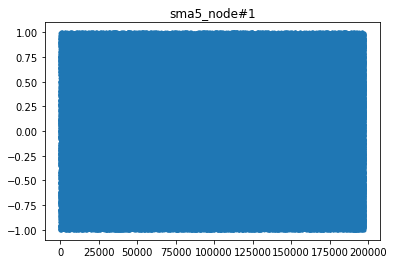

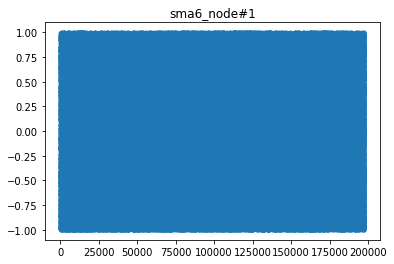

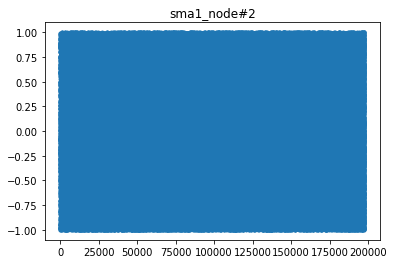

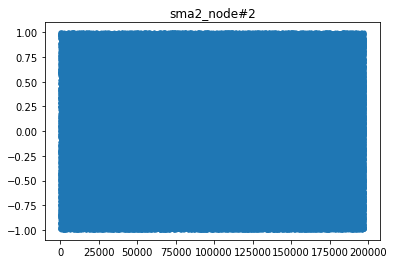

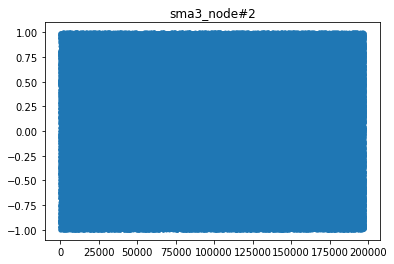

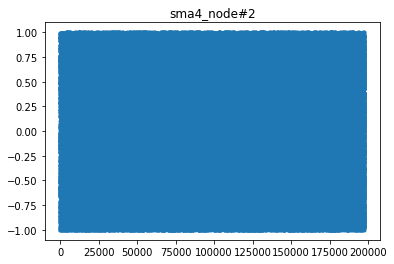

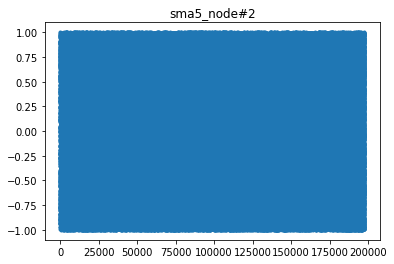

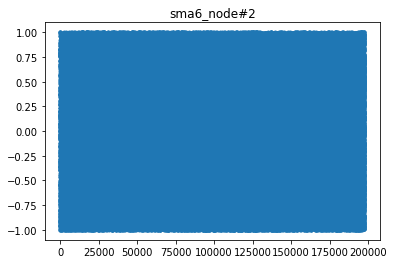

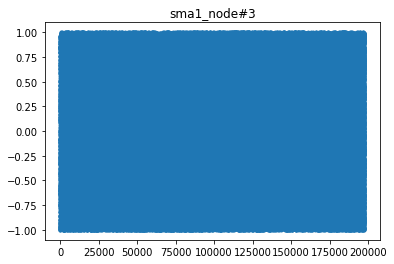

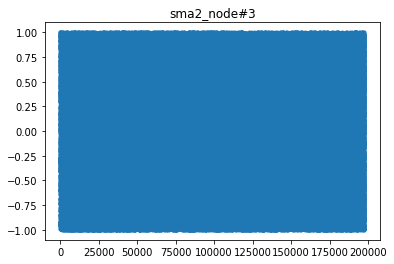

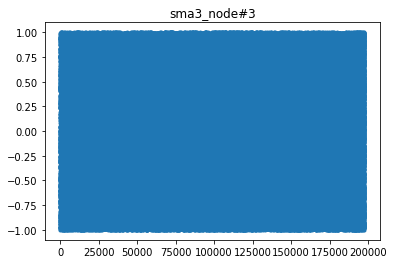

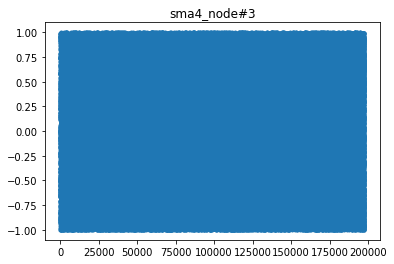

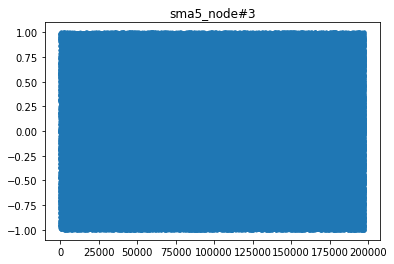

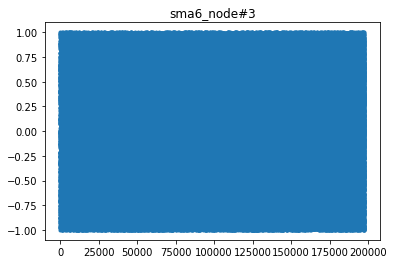

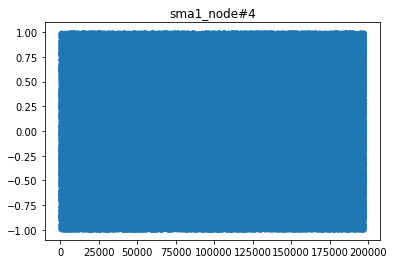

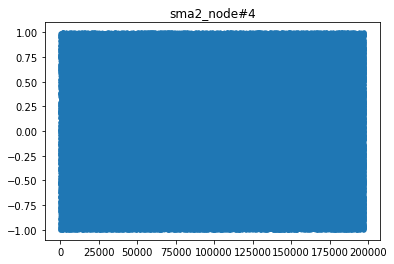

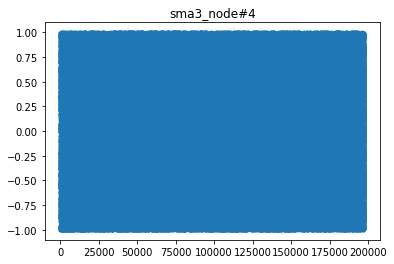

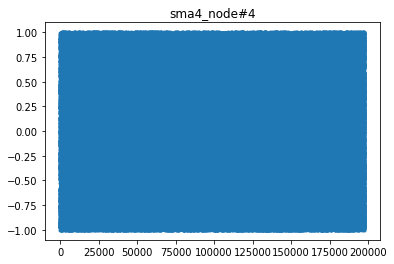

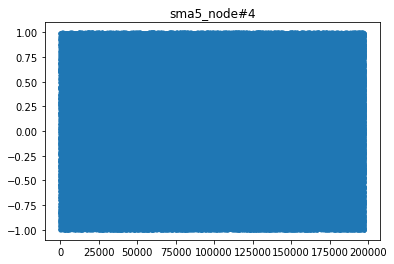

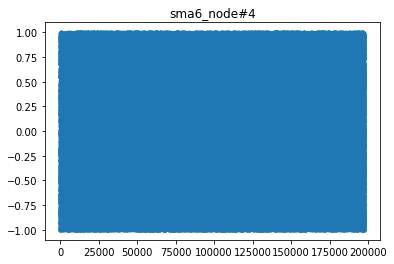

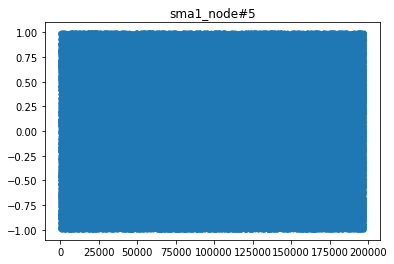

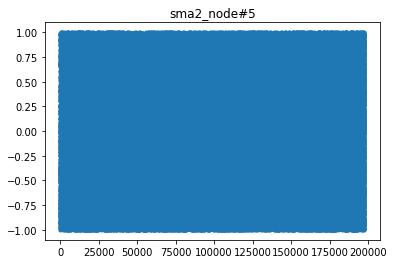

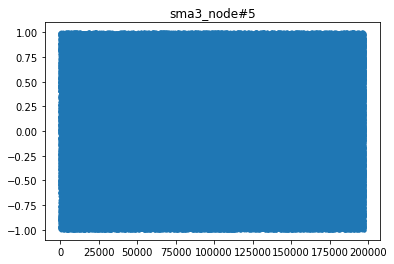

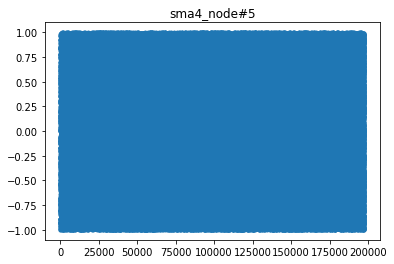

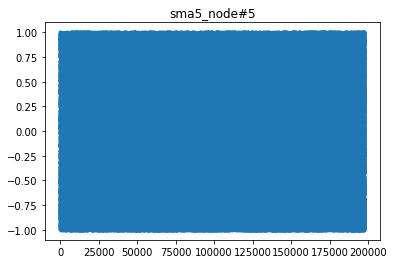

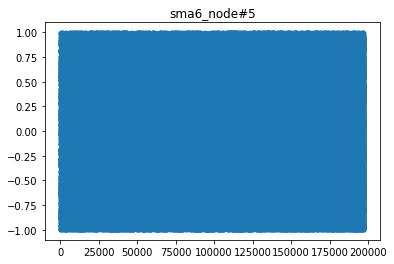

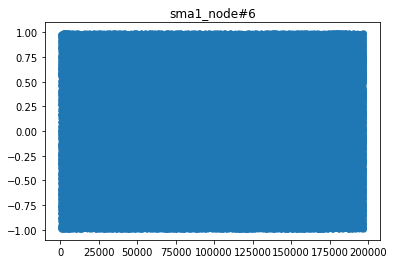

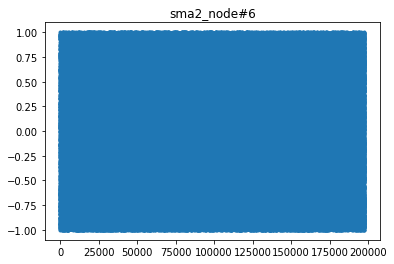

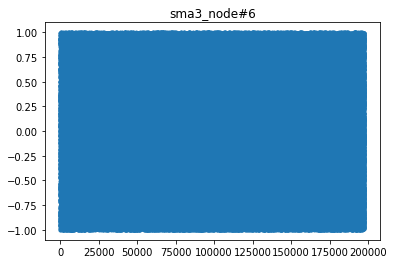

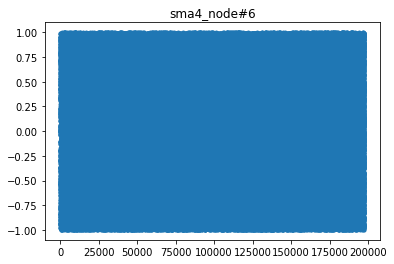

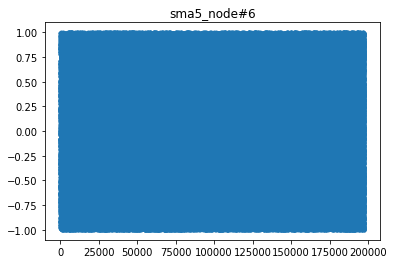

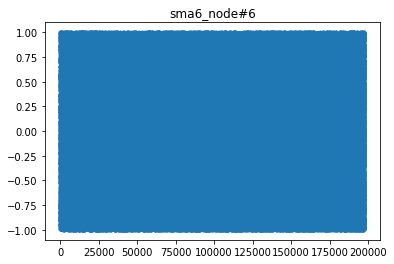

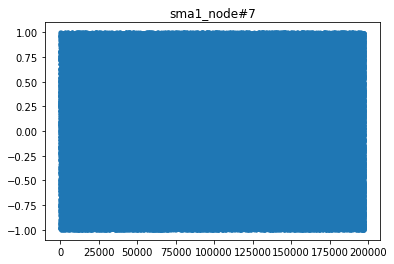

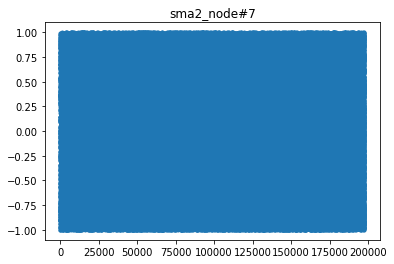

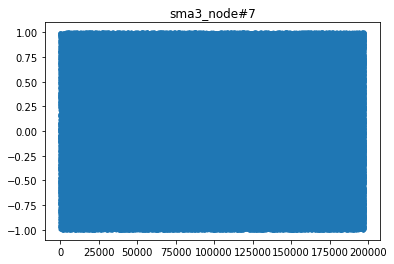

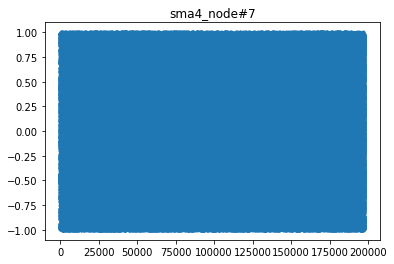

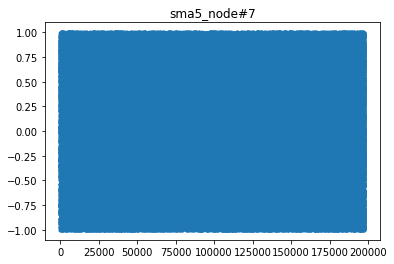

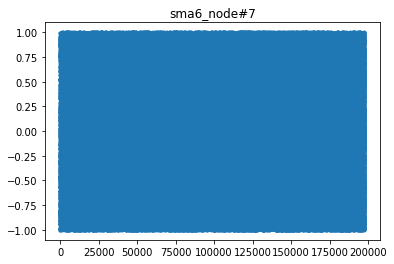

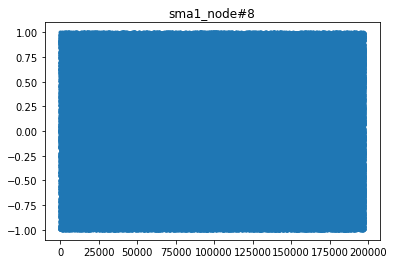

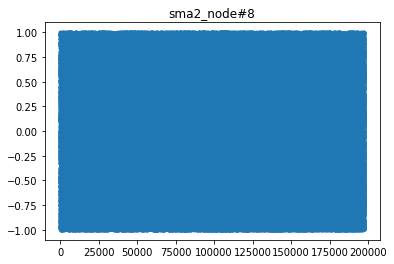

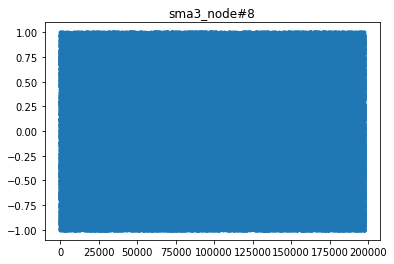

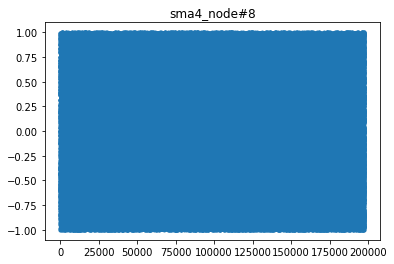

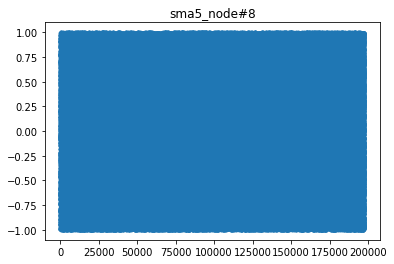

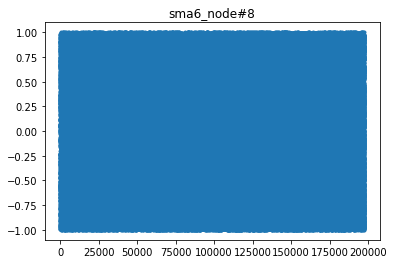

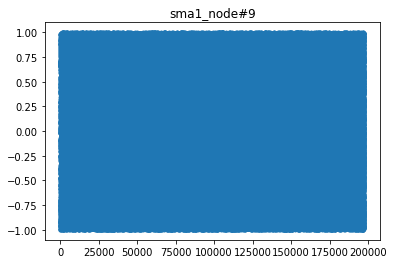

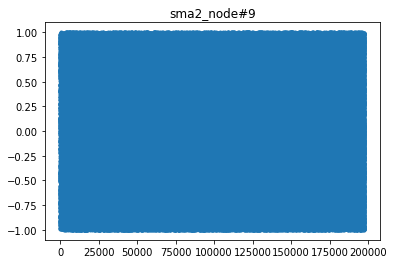

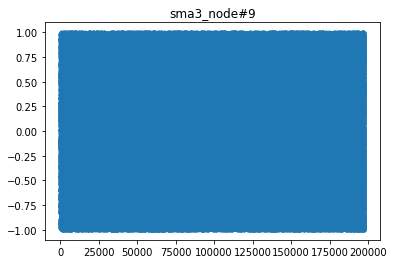

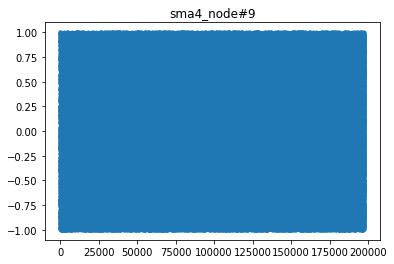

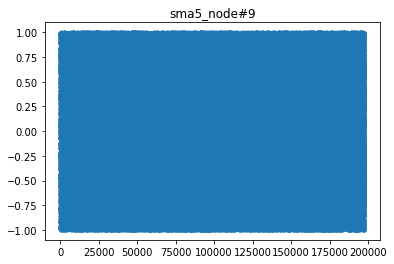

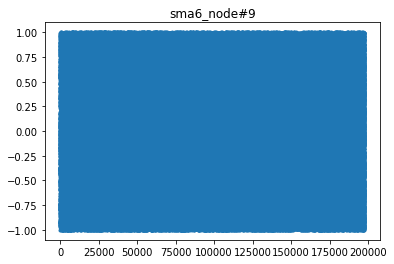

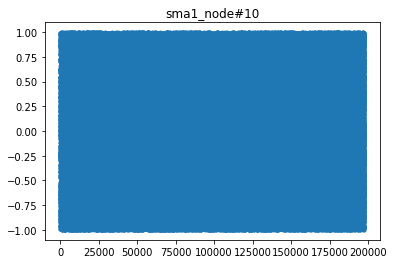

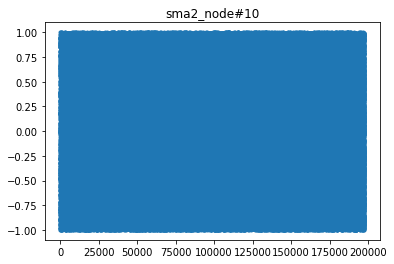

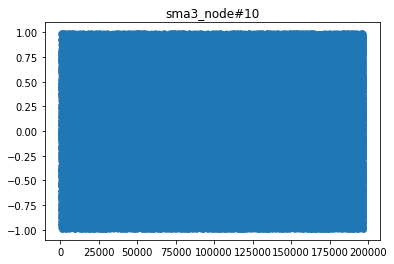

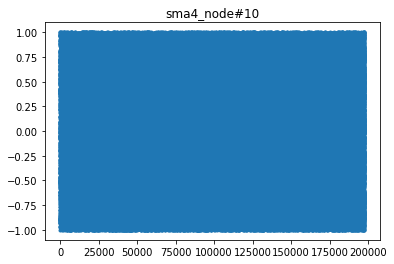

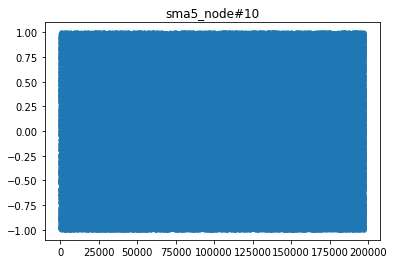

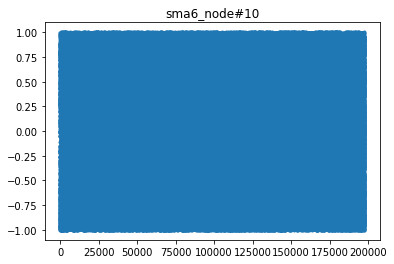

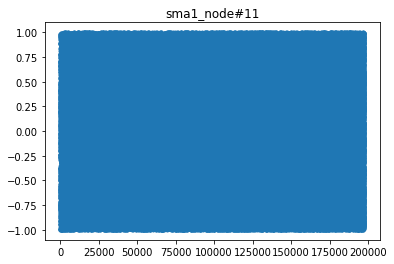

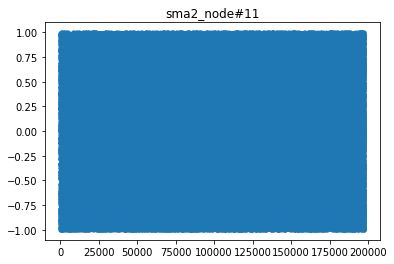

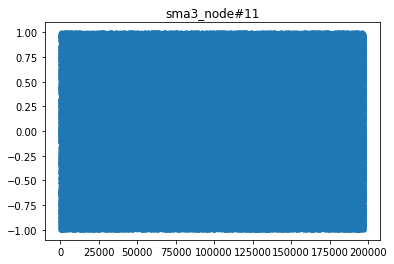

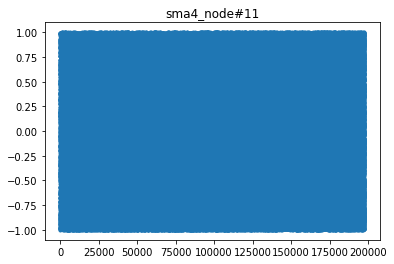

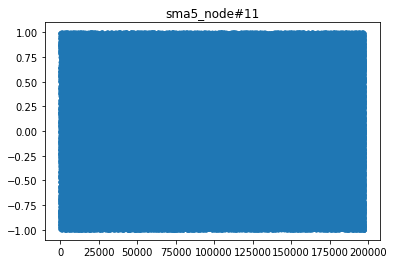

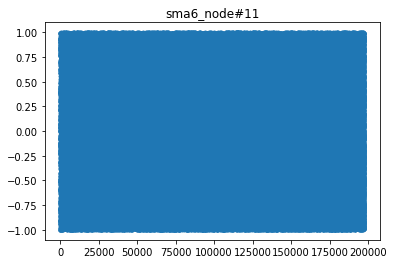

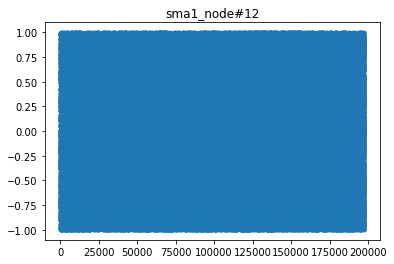

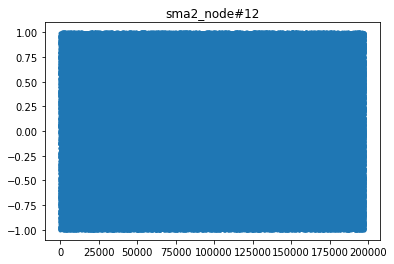

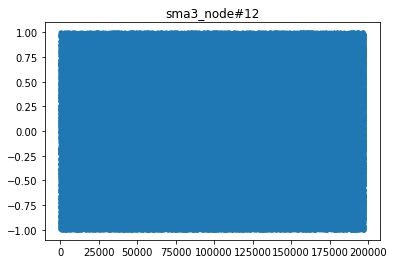

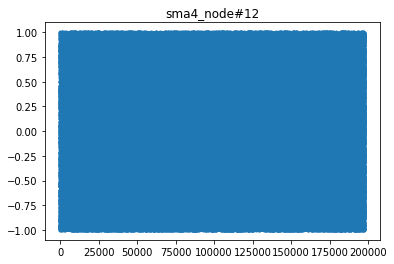

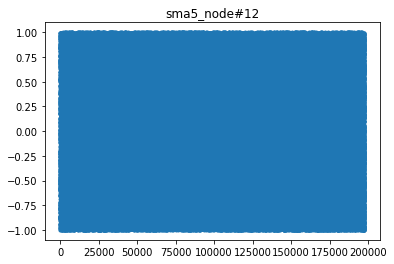

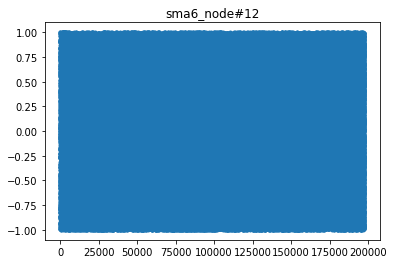

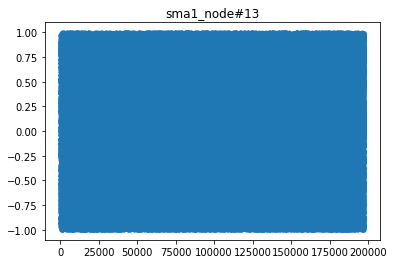

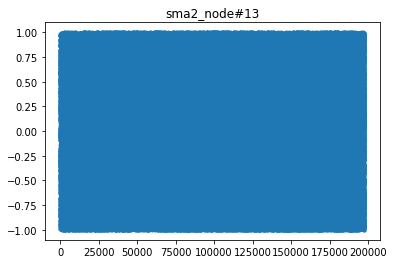

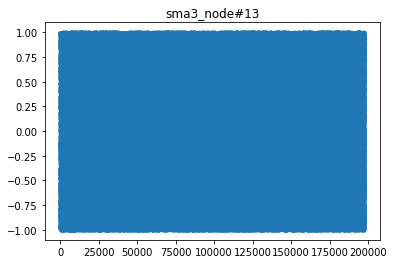

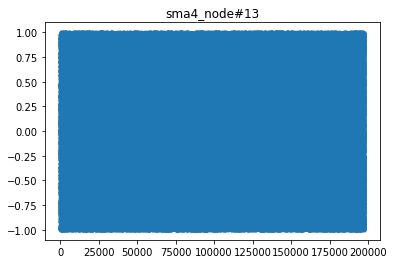

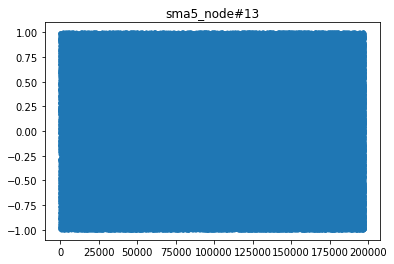

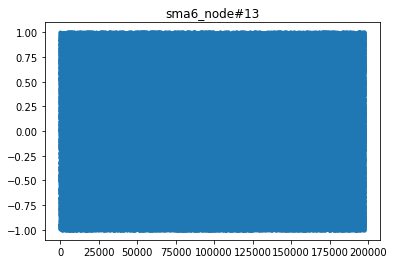

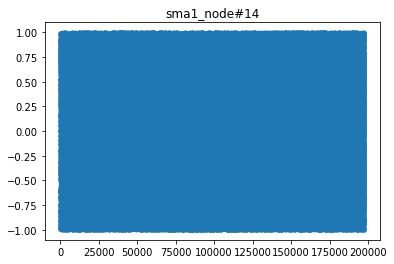

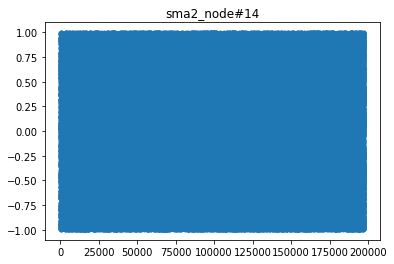

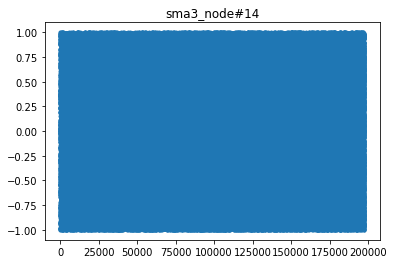

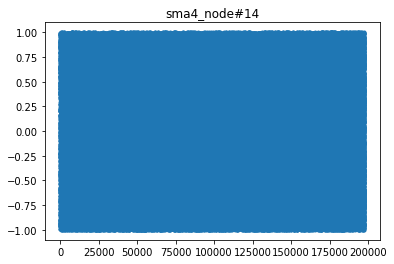

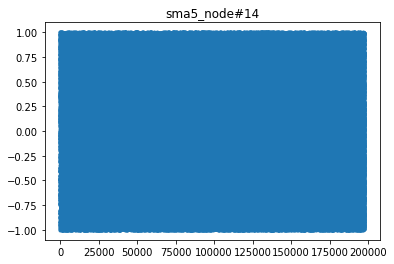

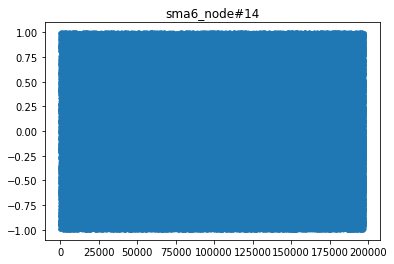

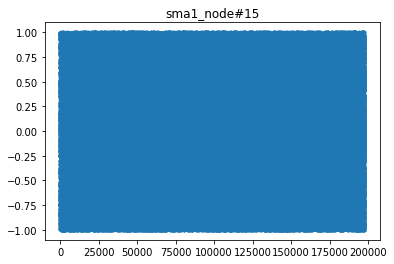

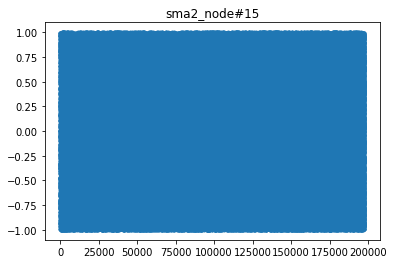

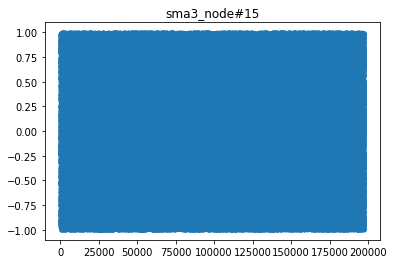

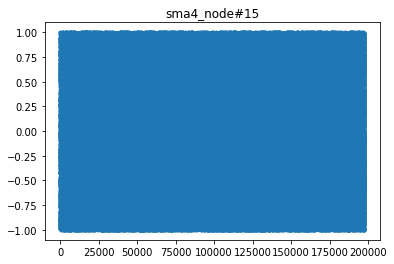

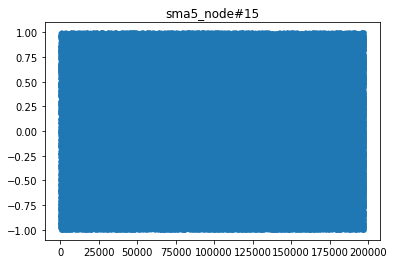

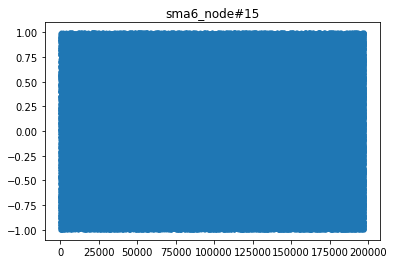

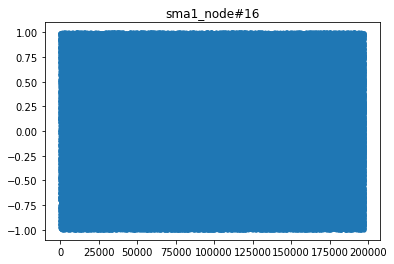

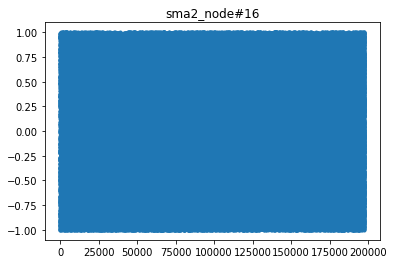

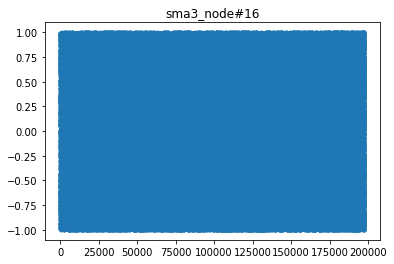

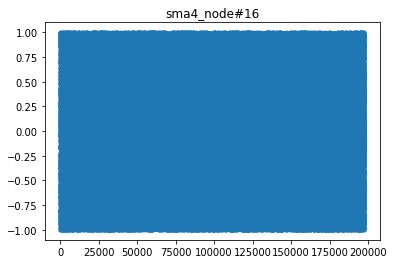

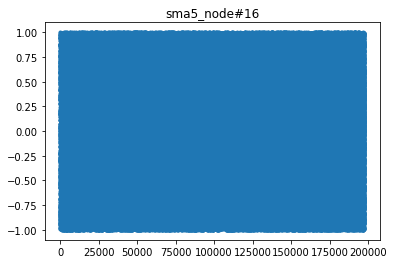

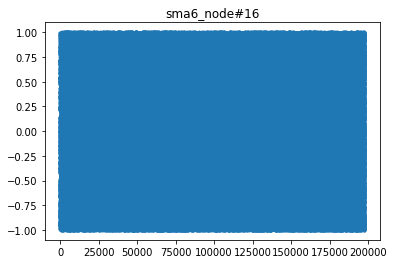

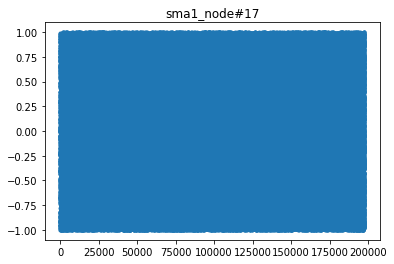

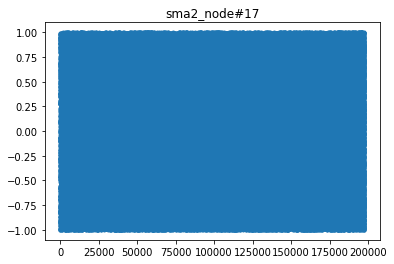

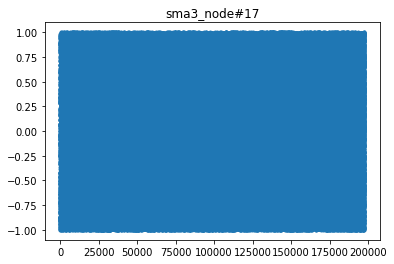

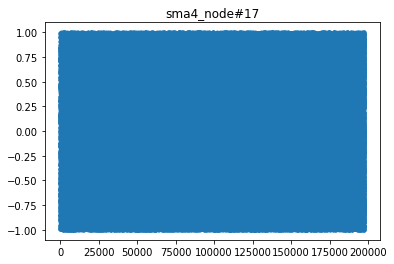

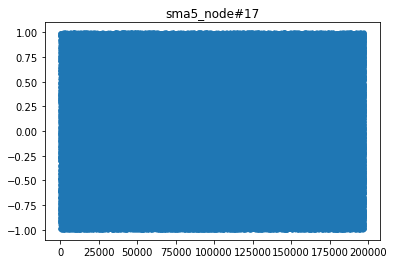

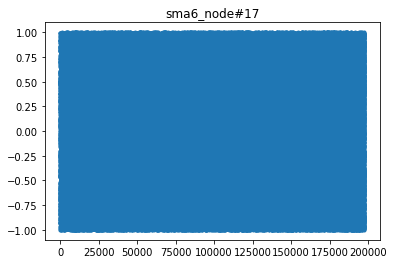

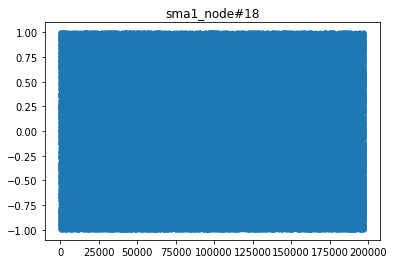

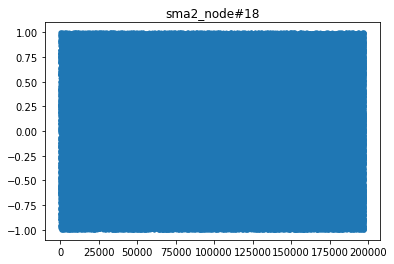

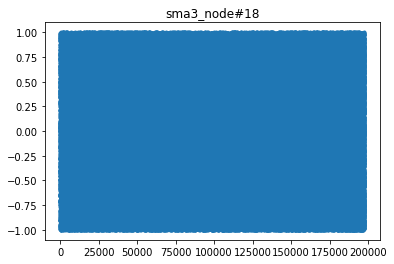

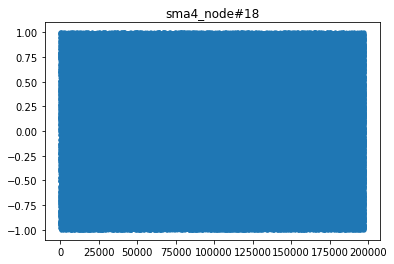

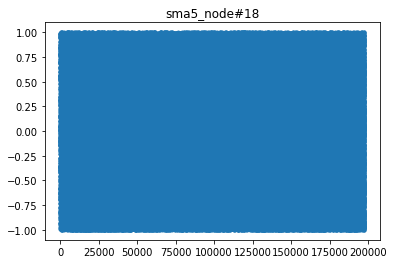

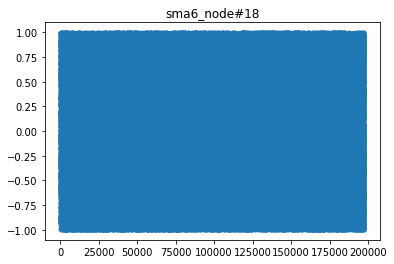

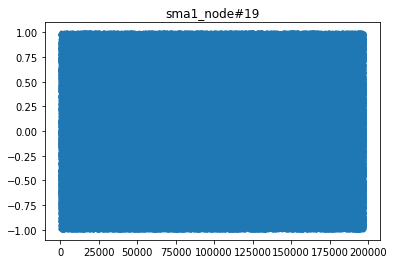

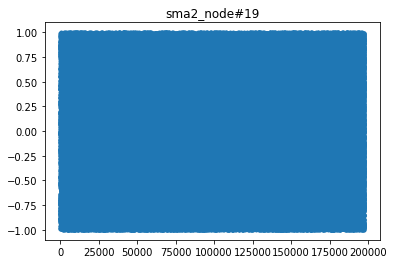

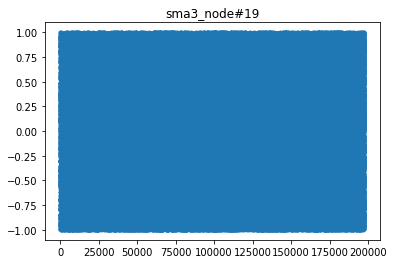

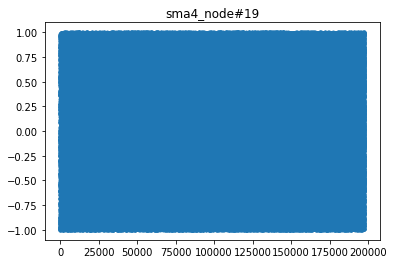

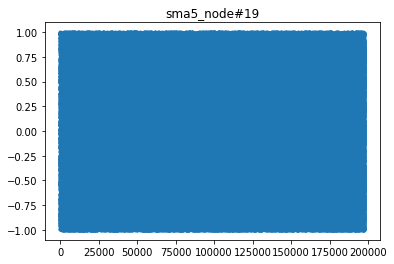

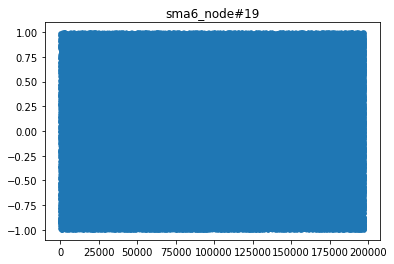

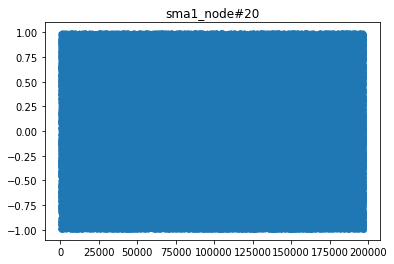

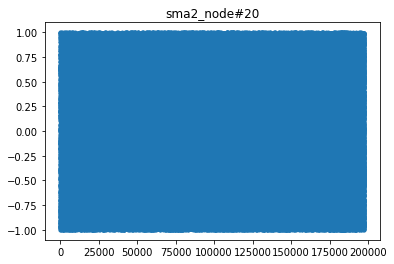

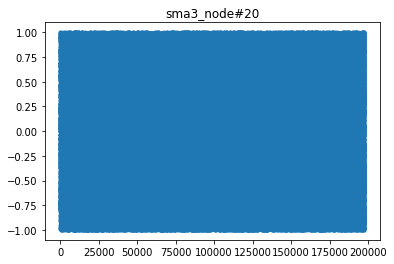

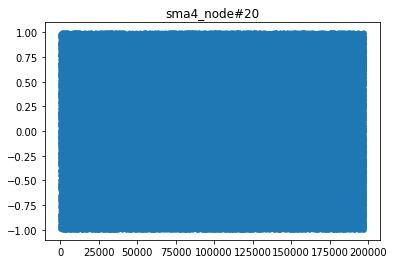

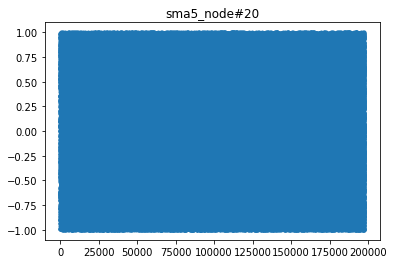

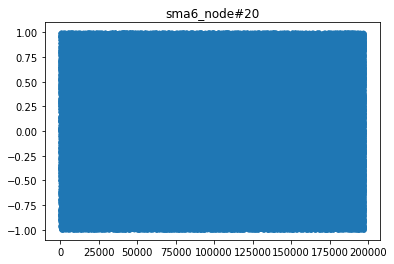

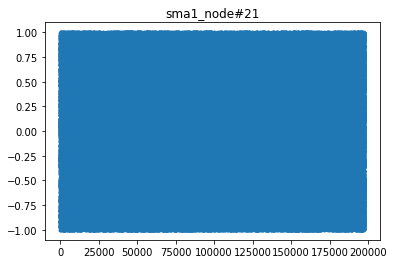

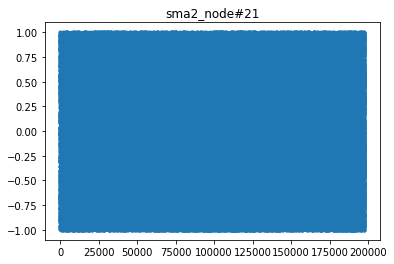

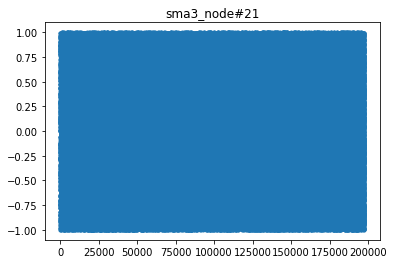

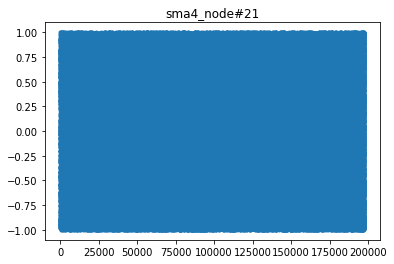

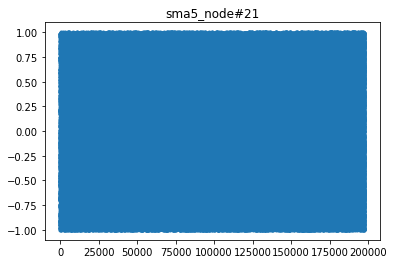

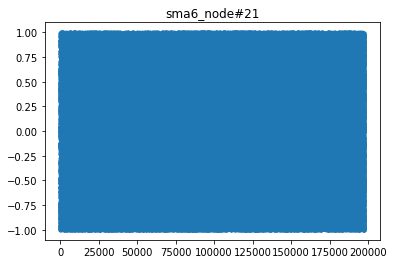

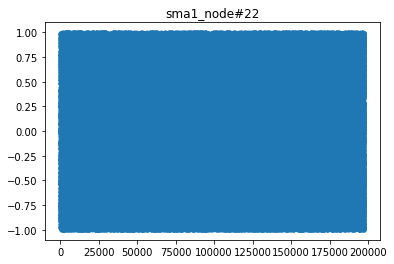

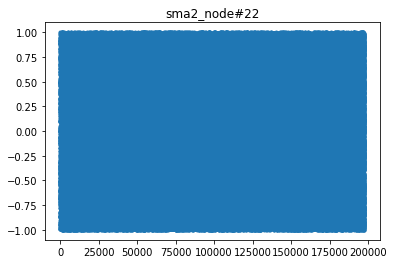

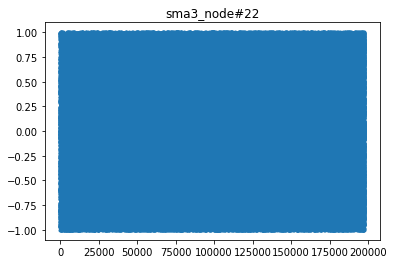

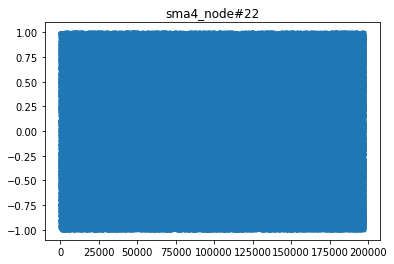

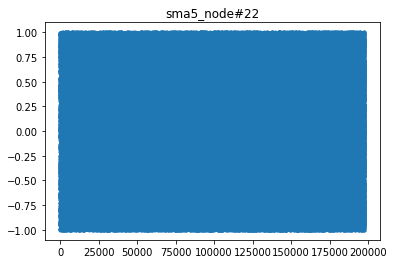

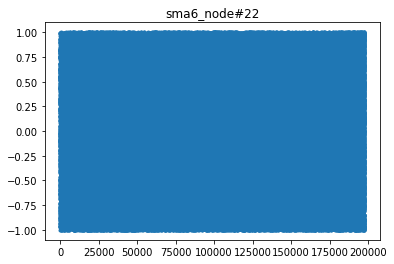

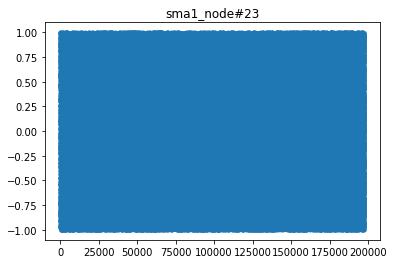

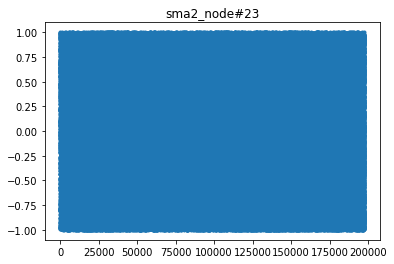

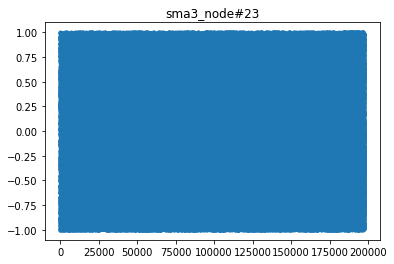

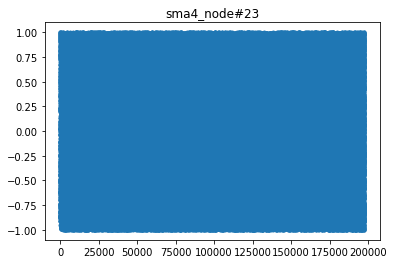

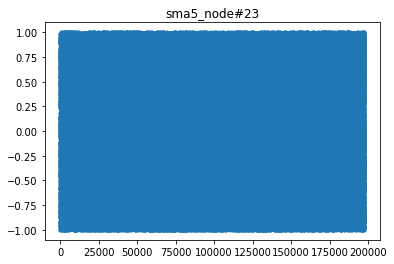

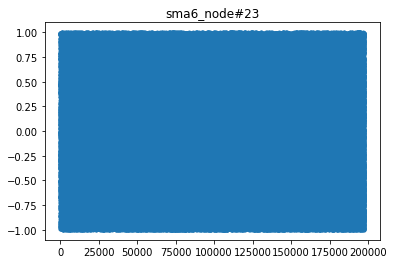

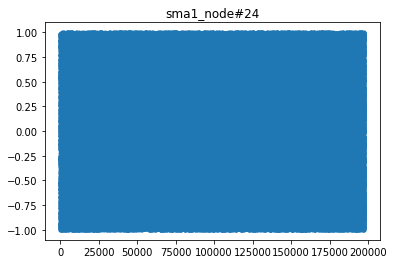

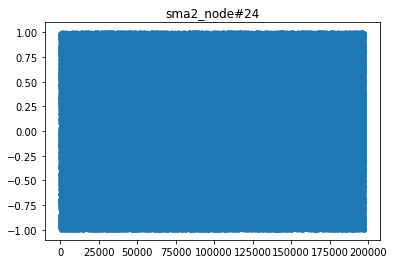

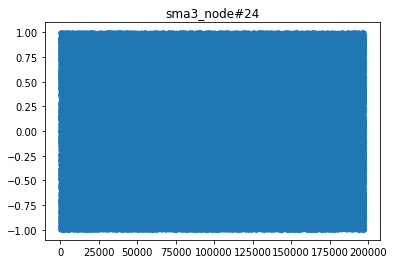

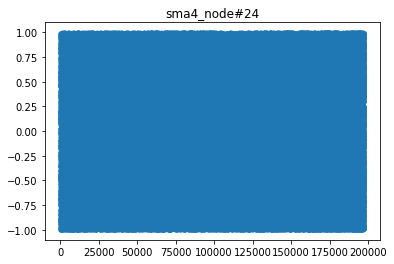

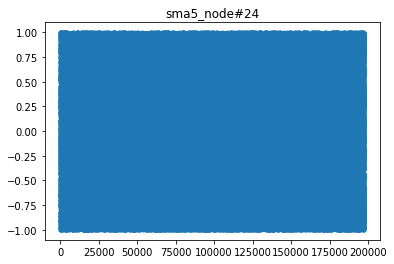

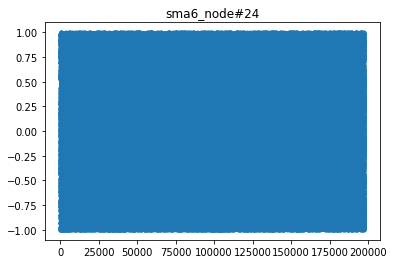

In [11]:
for col in Agent_1_action_df.columns:
    plt.figure()
    plt.plot(Agent_1_action_df.index, Agent_1_action_df[col],'.')
    plt.title(col)
    

# Reward

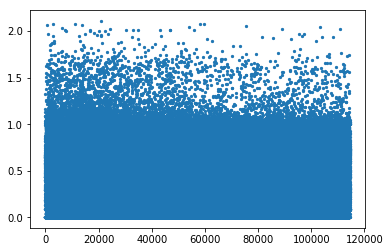

In [33]:
# Plot rewards
plt.scatter(Agent_1_interaction_data_all['data'].index, Agent_1_interaction_data_all['data']['Reward'], s=5)

## Visitor's location

In [20]:
# Convert log to CSV file
import re
# Process log
visitor_log_file = glob.glob("../SHARCNET/Results/debug/Random/"+file_date+"/*.out")
print(visitor_log_file)
for log_file in visitor_log_file:
    f_in = open(log_file, "r")

f_out = open("../SHARCNET/Results/debug/Random/"+file_date+"/visitor_log.csv","w")
cnt = 0
# skip lines in the header
for _ in range(300):
    line = f_in.readline()
    if 'Loading' in line:
        cnt += 1
    if cnt >= 25:
        break;
        
# save into CSV
f_out.write("Time,Location_x,Location_y,Location_z,Destination_x,Destination_y,Destination_z,Distance,Speed\n")
for line in f_in:
    if line.strip():
        # not empty line    
        x = re.search("^\d+(\.\d{1,2})", line)
        if x is not None:
            f_out.write(line.replace('(','').replace(')',''))
        
f_in.close()
f_out.close()

['../SHARCNET/Results/debug/Random/2019-09-02-173252\\s_random_18939795ob.out']


In [21]:
visitor_data = pd.read_csv("../SHARCNET/Results/debug/Random/"+file_date+"/visitor_log.csv", sep=',')
print(visitor_data.shape)

(4899995, 9)


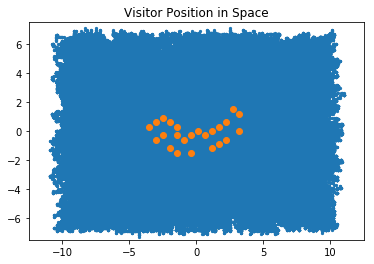

In [23]:
nodes_position = pd.read_csv("NodePosition.csv")

plt.scatter(visitor_data['Location_x'], visitor_data['Location_z'], s=5)
plt.xlim([-12.5,12.5])
plt.ylim([-7.5,7.5])
plt.title("Visitor Position in Space")
plt.scatter(nodes_position['x'], nodes_position['z'])

In [26]:
resolution = (10,10)
bins_x = np.linspace(-12.5,12.5,resolution[0]+1)
bins_z = np.linspace(-7.5,7.5,resolution[1]+1)
x_discretized = pd.cut(visitor_data['Location_x'],bins=bins_x,labels=np.linspace(0,resolution[0]-1,resolution[0],dtype=np.int32))
z_discretized = pd.cut(visitor_data['Location_z'],bins=bins_z,labels=np.linspace(0,resolution[0]-1,resolution[0],dtype=np.int32))

In [27]:
activity_map = np.zeros(resolution)
for i in range(len(x_discretized)):
    position = (x_discretized[i],z_discretized[i])
    activity_map[position] += 1

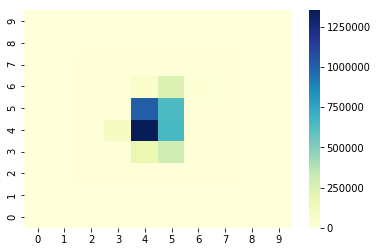

In [28]:
import seaborn

ax = seaborn.heatmap(activity_map, cmap="YlGnBu")
ax.invert_yaxis()

### Moving distance

In [7]:
# movements in vector
visitor_data['Movement_x'] = visitor_data['Location_x'].diff()
visitor_data['Movement_z'] = visitor_data['Location_z'].diff()

import math
movement_length = []
for idx, row in visitor_data.iterrows():
    x = row['Movement_x']
    z = row['Movement_z']
    d = math.sqrt(z*z+x*x)
    movement_length.append(d)


0               NaN
1          0.000000
2          0.000000
3          0.000000
4          0.000000
5          0.000000
6          0.000000
7          0.000000
8          0.000000
9          0.000000
10         0.000000
11         0.000000
12         0.200000
13         0.000000
14         0.000000
15         0.141421
16         0.000000
17         0.000000
18         0.000000
19         0.000000
20         0.000000
21         0.200000
22         0.000000
23         0.100000
24         0.100000
25         0.000000
26         0.100000
27         0.000000
28         0.100000
29         0.200000
             ...   
4899965    0.000000
4899966    0.000000
4899967    0.000000
4899968    0.000000
4899969    0.000000
4899970    0.000000
4899971    0.000000
4899972    0.000000
4899973    0.000000
4899974    0.000000
4899975    0.000000
4899976    0.000000
4899977    0.000000
4899978    0.000000
4899979    0.000000
4899980    0.200000
4899981    0.000000
4899982    0.000000
4899983    0.000000


In [28]:
visitor_data['Movement_length'] = movement_length

Text(0.5, 1.0, 'SARA: Movement')

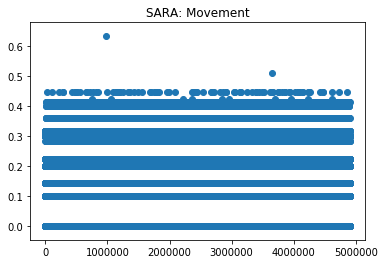

In [8]:
# plot
plt.scatter(visitor_data.index[1:], visitor_data['Movement_length'][1:])
plt.title("Random: Movement")

In [31]:
total_length = visitor_data['Movement_length'][1:].copy().values # copy() is important!
for i in range(1,len(total_length)):
    total_length[i] = total_length[i] + total_length[i-1]

Text(0.5, 0, 'Step')

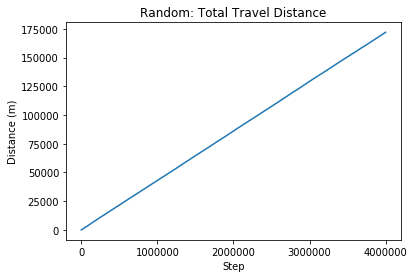

In [34]:
plt.plot(np.linspace(1,len(total_length[:4000000]),len(total_length[:4000000])), total_length[:4000000])
plt.locator_params(nbins=5, axis='x')
plt.title("Random: Total Travel Distance")
plt.ylabel('Distance (m)')
plt.xlabel('Step')

In [35]:
# plot pla, sara and random in one plot using %store

%store -r total_length_pla
%store -r total_length_SARA


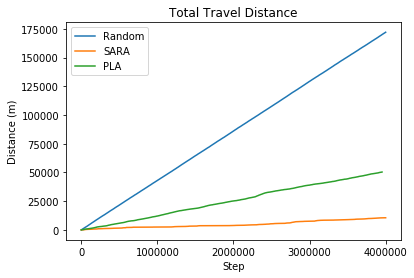

In [39]:
plt.plot(np.linspace(1,len(total_length[:4000000]),len(total_length[:4000000])), total_length[:4000000], label='Random')
plt.plot(np.linspace(1,len(total_length_SARA[:4000000]),len(total_length_SARA[:4000000])), total_length_SARA[:4000000], label='SARA')
plt.plot(np.linspace(1,len(total_length_pla),len(total_length_pla)), total_length_pla, label='PLA')
plt.locator_params(nbins=5, axis='x')
plt.title("Total Travel Distance")
plt.ylabel('Distance (m)')
plt.xlabel('Step')
plt.legend()

### Destination changes

In [58]:
dest_change_x = [False]
for i in range(1,visitor_data.shape[0]):
    dest_change_x.append(visitor_data.iloc[i]["Destination_x"] != visitor_data.iloc[i-1]["Destination_x"])

In [59]:
dest_change = dest_change_x
for i in range(1, visitor_data.shape[0]):
    if dest_change_x[i]:
        dest_change[i] = visitor_data.iloc[i]["Destination_z"] != visitor_data.iloc[i-1]["Destination_z"]

In [60]:
total_dest_change = dest_change.copy()
total_dest_change[0] = 0
for i in range(1,len(total_dest_change)):
    total_dest_change[i] = total_dest_change[i] + total_dest_change[i-1]

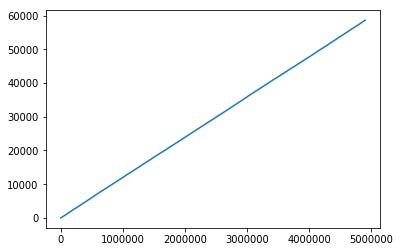

In [67]:
plt.plot(total_dest_change)

In [68]:

%store -r total_dest_change_PLA
%store -r total_dest_change_SARA

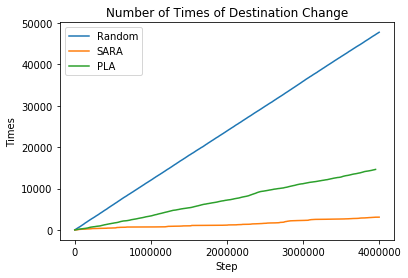

In [71]:
plt.plot(np.linspace(1,len(total_dest_change[:4000000]),len(total_dest_change[:4000000])), total_dest_change[:4000000], label='Random')
plt.plot(np.linspace(1,len(total_dest_change_SARA[:4000000]),len(total_dest_change_SARA[:4000000])), total_dest_change_SARA[:4000000], label='SARA')
plt.plot(np.linspace(1,len(total_dest_change_PLA),len(total_dest_change_PLA)), total_dest_change_PLA, label='PLA')
plt.locator_params(nbins=5, axis='x')
plt.title("Number of Times of Destination Change")
plt.ylabel('Times')
plt.xlabel('Step')
plt.legend()

In [2]:
s = 0
gamma = 0.99
for i in range(1000):
        s+= gamma**i

In [4]:
import os
os.path.join(os.path.abspath('.'), 'save',None)

TypeError: join() argument must be str or bytes, not 'NoneType'